In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv('HRDataset_v14.csv')

In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [35]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')


In [37]:
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [39]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNull values in columns:\033[0m")
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if len(null_columns) > 0:
        for col, count in null_columns.items():
            print(f"\033[1m{col}\033[0m: {count}")
    else:
        print("There are no null values in the DataFrame.")
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)
    return df.describe().transpose()

# Call the function
get_df_info(df)


Shape of DataFrame:  (311, 36)

Columns in DataFrame:  ['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']

Data types of columns:
 Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                        

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

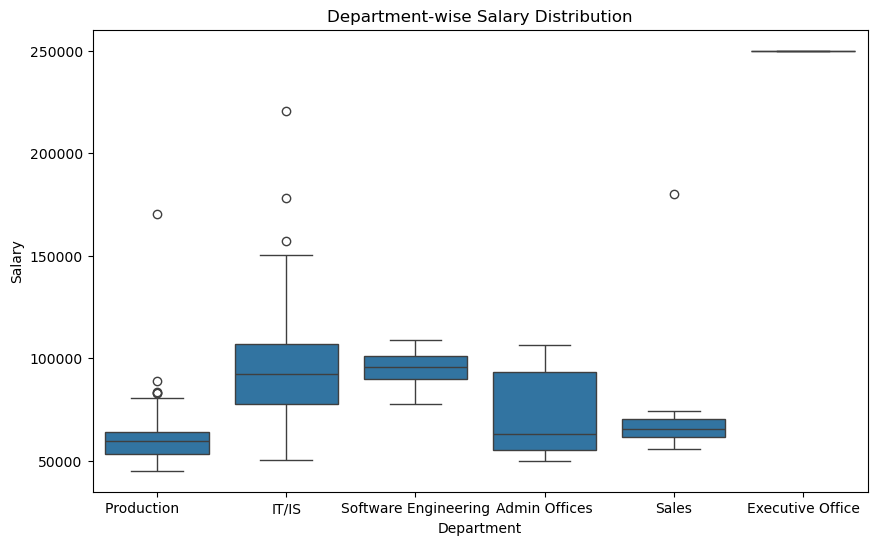

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Department", y="Salary", data=df)
plt.title("Department-wise Salary Distribution")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.show()

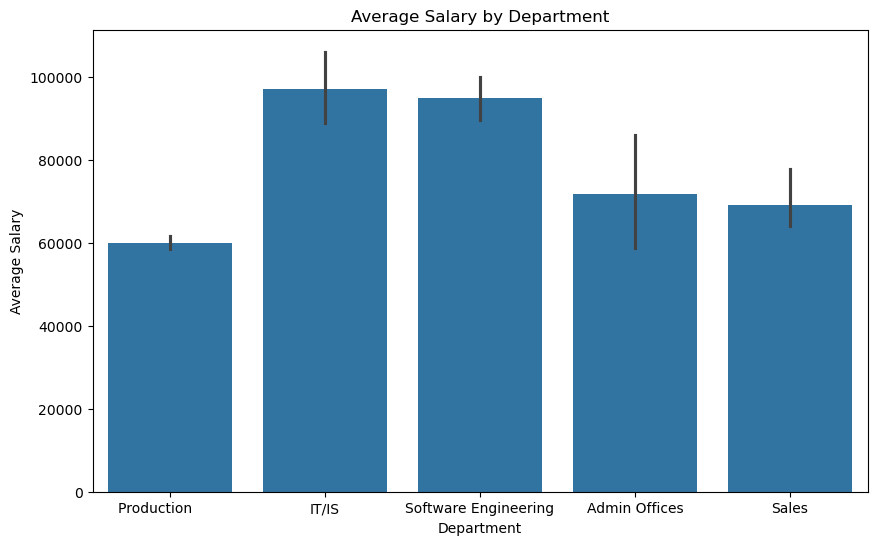

In [45]:
# Average Salary by department
plt.figure(figsize=(10, 6))
sns.barplot(x="Department", y="Salary", data=df[df["Department"]!= "Executive Office"], estimator=np.mean)
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()


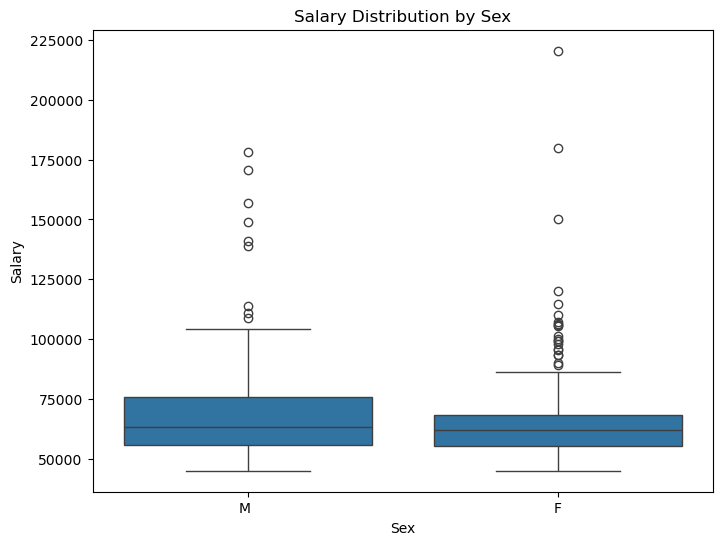

In [47]:
# Salary Distribution by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Salary", data=df[df["Department"]!= "Executive Office"])
plt.title("Salary Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

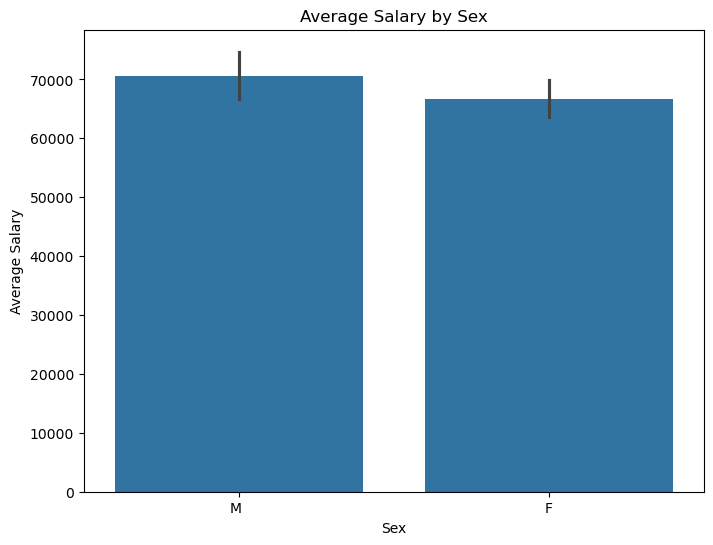

In [49]:
# Average Salary by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="Salary", data=df[df["Department"]!= "Executive Office"], estimator=np.mean)
plt.title("Average Salary by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Salary")
plt.show()


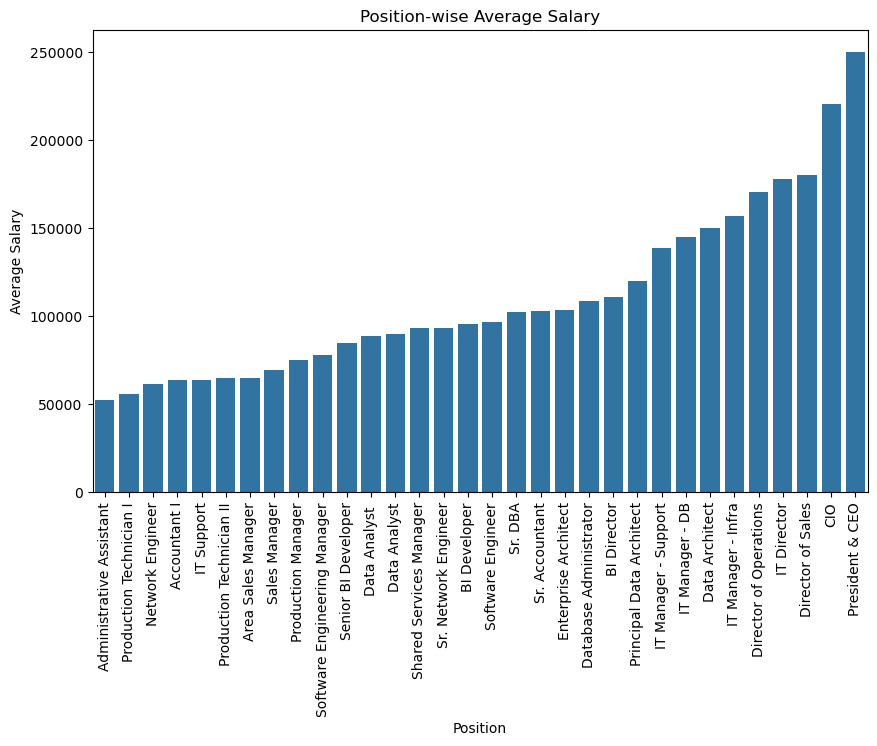

In [51]:
# Average Salary by Position
plt.figure(figsize=(10, 6))
data = df.groupby("Position")["Salary"].mean().reset_index()
data = data.sort_values("Salary")  # sort by average salary in ascending order
sns.barplot(x="Position", y="Salary", data=data)
plt.title("Position-wise Average Salary")
plt.xlabel("Position")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.show()

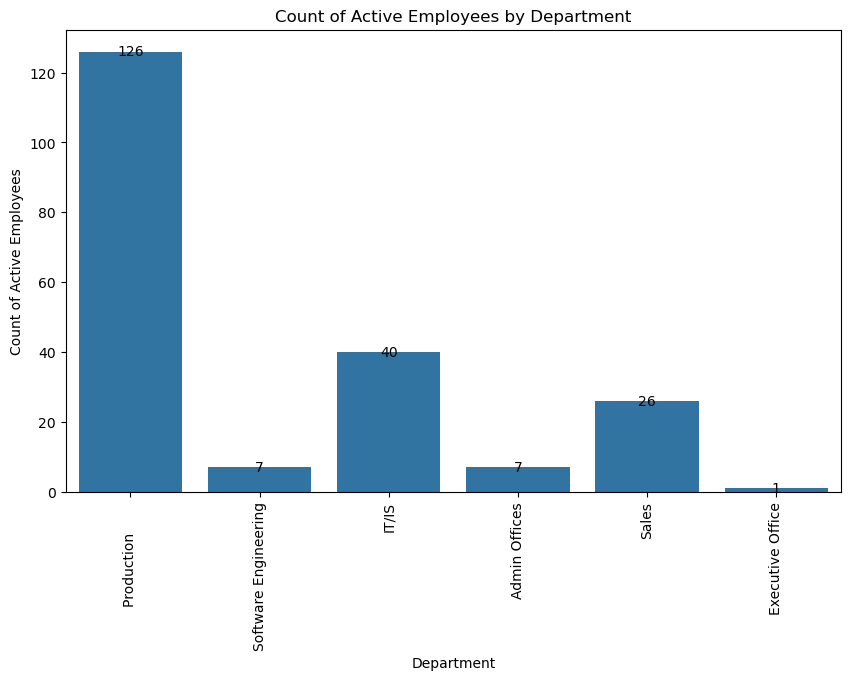

In [53]:
#Department wise Active Employees
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Department", data=df[df['Termd'] == 0])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')
plt.title("Count of Active Employees by Department")
plt.xlabel("Department")
plt.ylabel("Count of Active Employees")
plt.xticks(rotation=90)
plt.show()


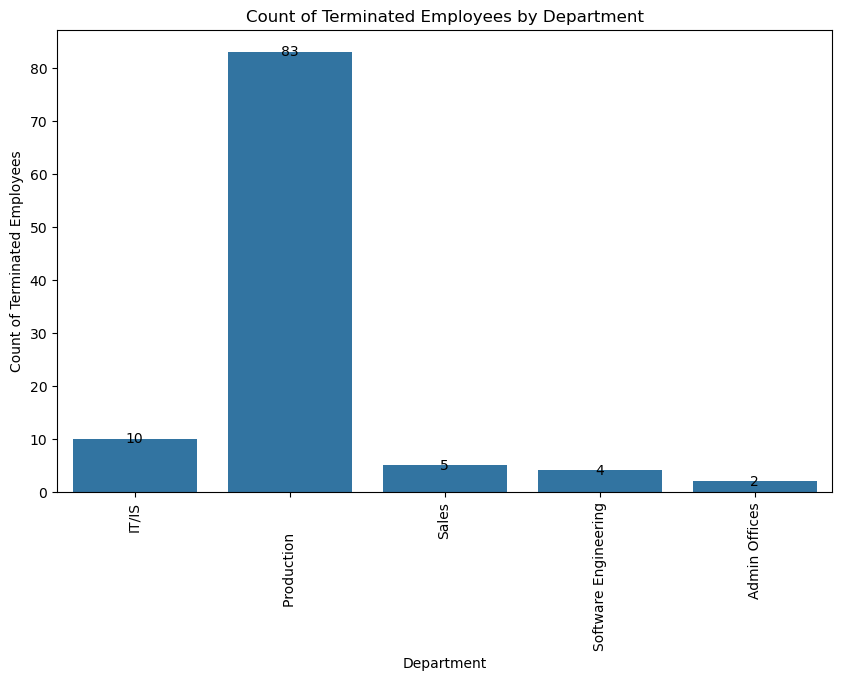

In [55]:
# Count of Terminated Employees by Department
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Department", data=df[df['Termd'] == 1])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of Terminated Employees by Department")
plt.xlabel("Department")
plt.ylabel("Count of Terminated Employees")
plt.xticks(rotation=90)
plt.show()

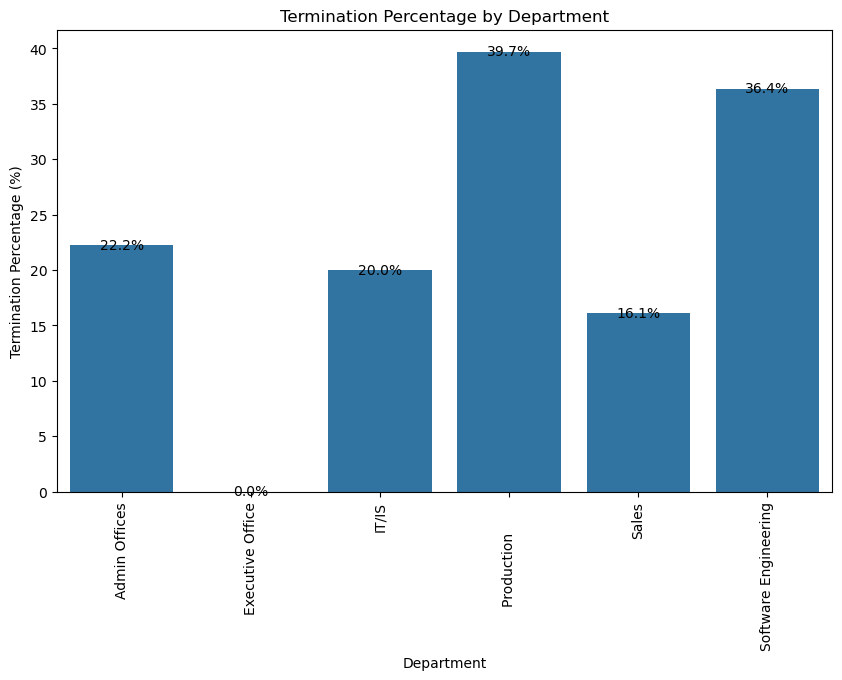

In [57]:
# Calculate termination percentage for each department
termination_percentage = df.groupby('Department')['Termd'].mean().reset_index()
termination_percentage.columns = ['Department', 'Termination Percentage']
termination_percentage['Termination Percentage'] = termination_percentage['Termination Percentage'] * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Department", y="Termination Percentage", data=termination_percentage)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.1f}%', ha='center', va='center')

plt.title("Termination Percentage by Department")
plt.xlabel("Department")
plt.ylabel("Termination Percentage (%)")
plt.xticks(rotation=90)
plt.show()


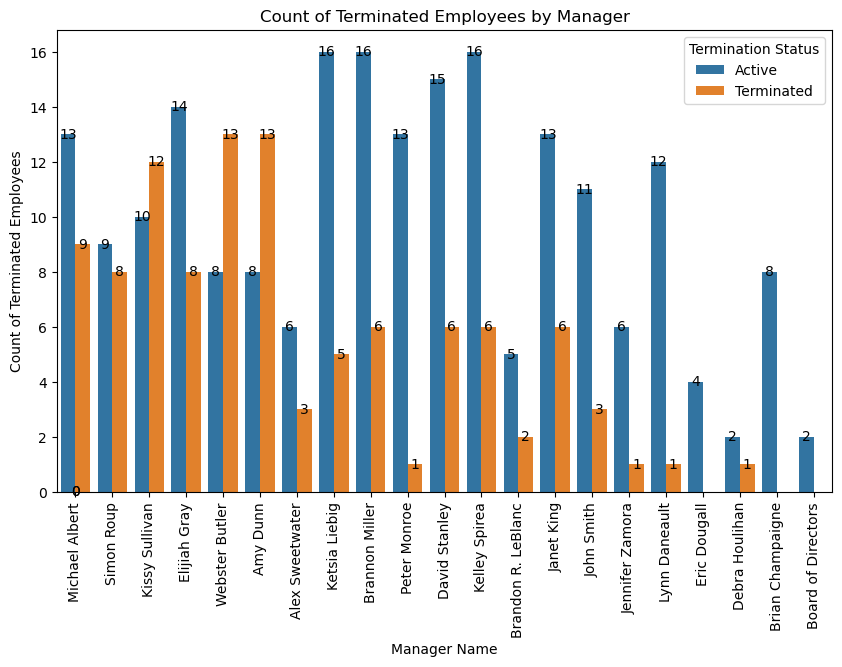

In [59]:
# Count of Terminated Employees by Manager
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="ManagerName", hue="Termd", data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of Terminated Employees by Manager")
plt.xlabel("Manager Name")
plt.ylabel("Count of Terminated Employees")
plt.xticks(rotation=90)
plt.legend(title="Termination Status", labels=["Active", "Terminated"])
plt.show()

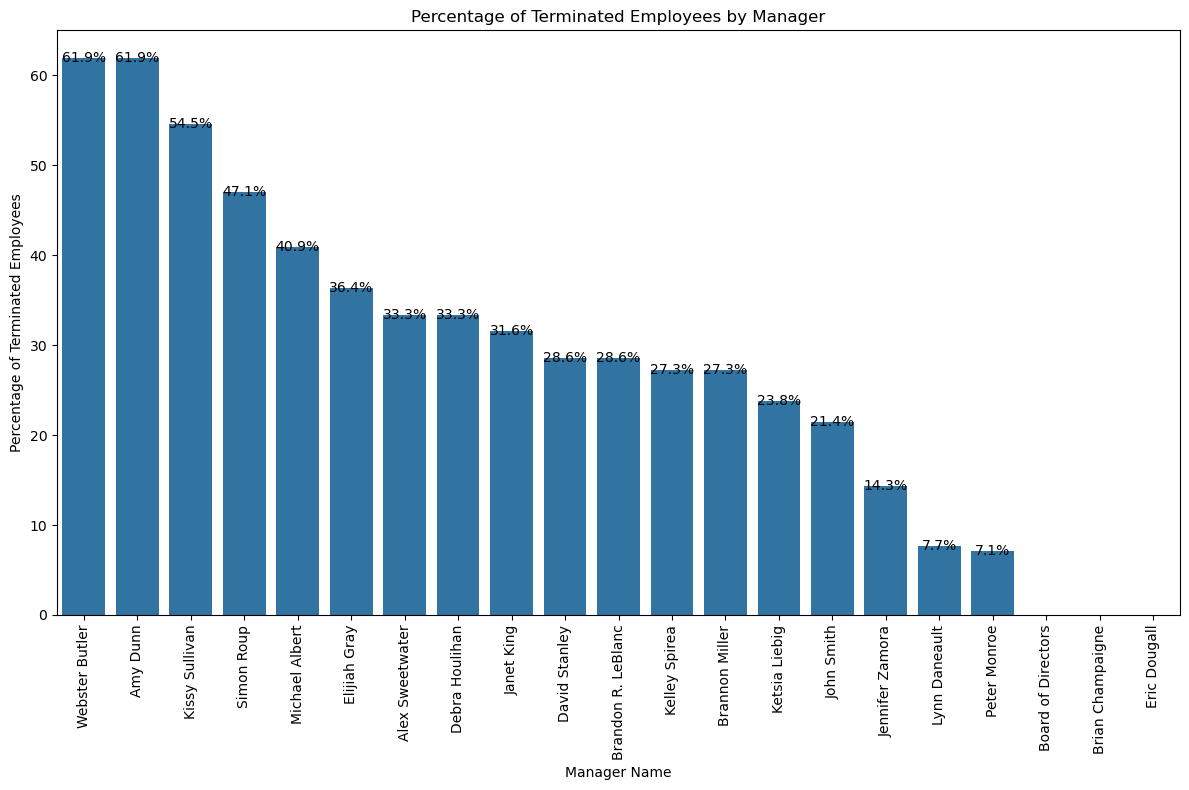

In [61]:
# Calculate the percentage of terminated employees for each manager
terminated_pct = df[df['Termd'] == 1].groupby("ManagerName").size().div(df.groupby("ManagerName").size()).mul(100).reset_index(name="Terminated Pct")

# Sort the dataframe by the percentage of terminated employees in descending order
terminated_pct = terminated_pct.sort_values("Terminated Pct", ascending=False)

plt.figure(figsize=(12, 8))  # Increased figure size to accommodate more spacing
ax = sns.barplot(x="ManagerName", y="Terminated Pct", data=terminated_pct, ci=None)  # Removed confidence intervals to reduce bar width

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.1f}%', ha='center', va='center')

plt.title("Percentage of Terminated Employees by Manager")
plt.xlabel("Manager Name")
plt.ylabel("Percentage of Terminated Employees")
plt.xticks(rotation=90)
plt.tight_layout()  # Added to ensure labels fit within the figure area
plt.show()


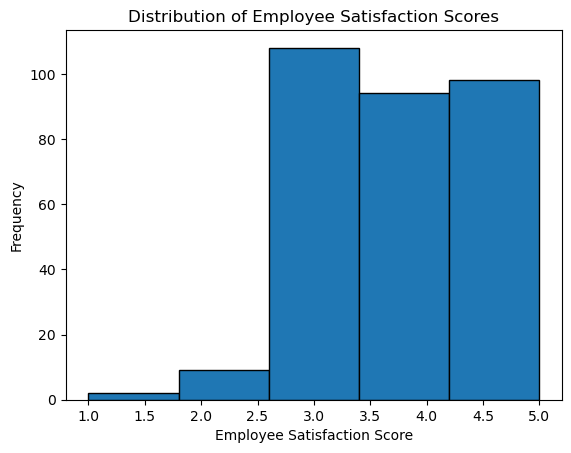

In [63]:
# Visualize the distribution of EmpSatisfaction scores
plt.hist(df['EmpSatisfaction'], bins=5, edgecolor='black')
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Satisfaction Scores')
plt.show()


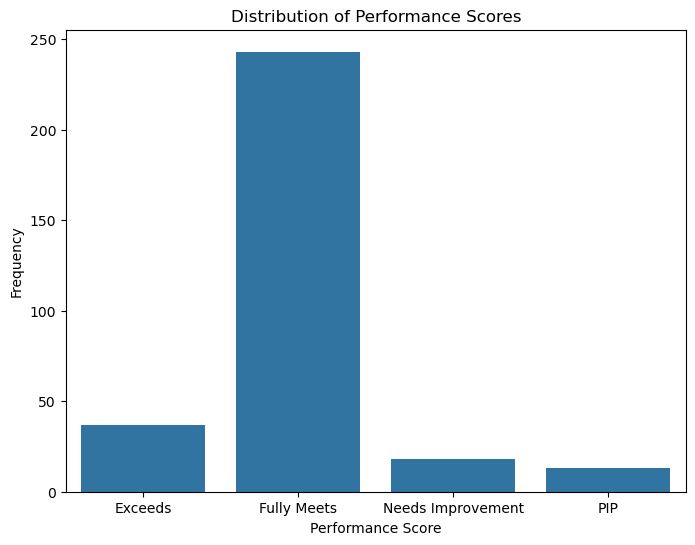

In [65]:
# Visualize the distribution of Performance Scores
plt.figure(figsize=(8, 6))
sns.countplot(x='PerformanceScore', data=df)
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Scores')
plt.show()


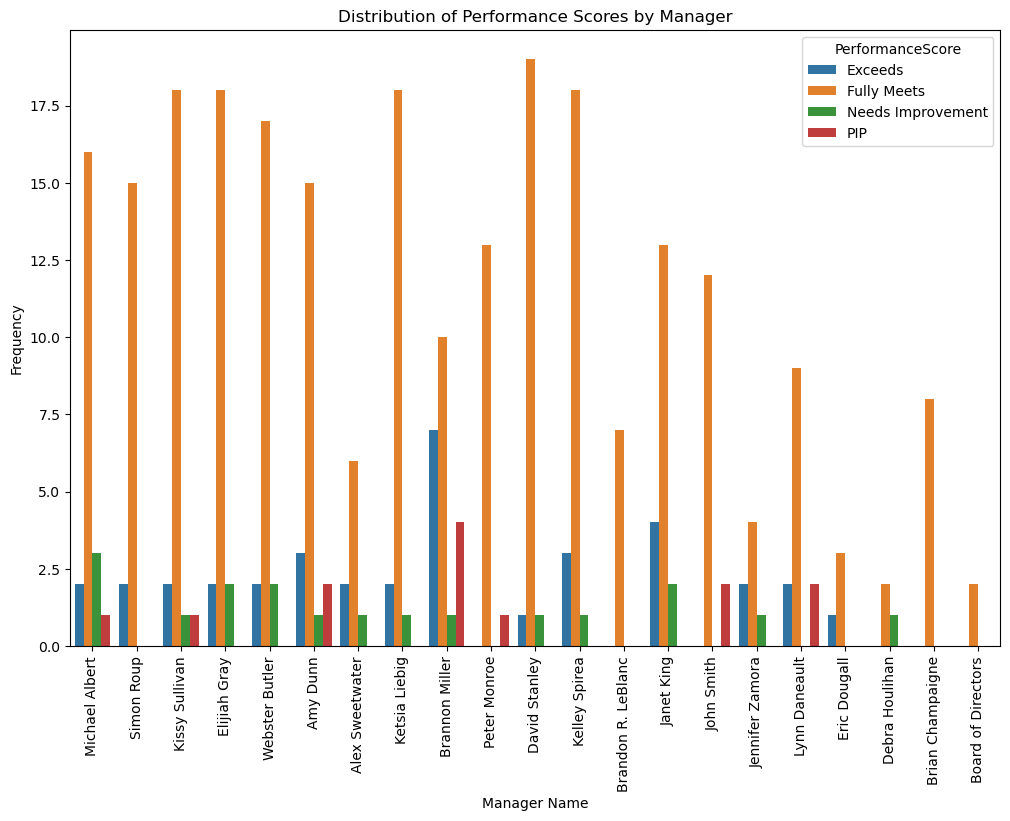

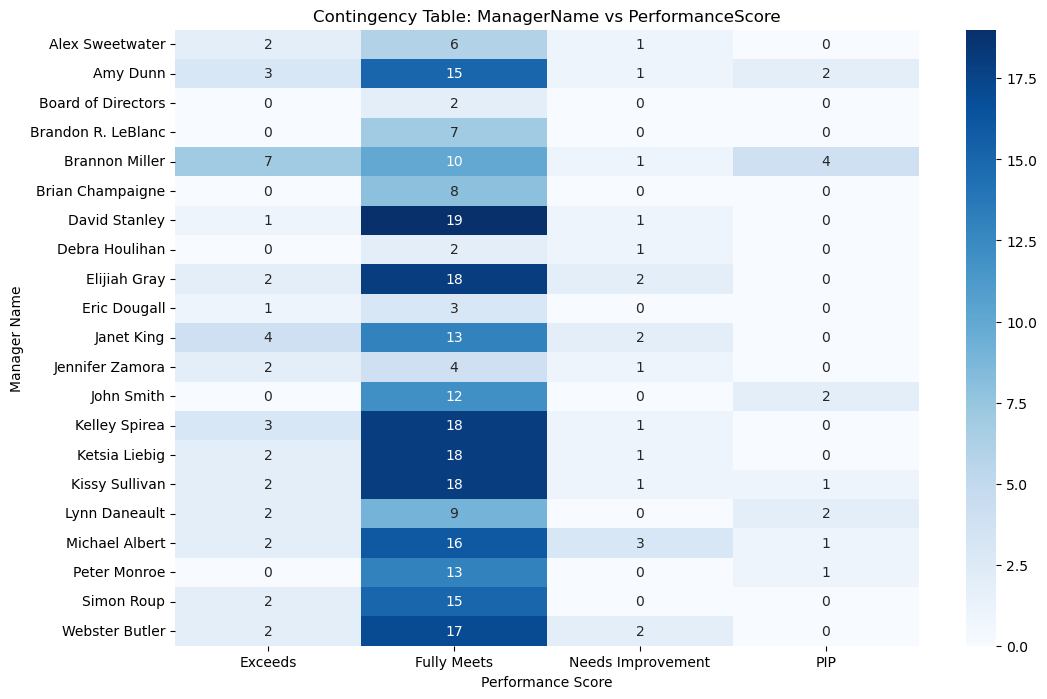

NameError: name 'chi2_contingency' is not defined

In [67]:
# Visualize the distribution of Performance Scores by ManagerName
plt.figure(figsize=(12, 8))
sns.countplot(x='ManagerName', hue='PerformanceScore', data=df)
plt.xlabel('Manager Name')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Scores by Manager')
plt.xticks(rotation=90)
plt.show()

# Create a contingency table to analyze the relationship between ManagerName and PerformanceScore
contingency_table = pd.crosstab(df['ManagerName'], df['PerformanceScore'])

# Visualize the contingency table using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Performance Score')
plt.ylabel('Manager Name')
plt.title('Contingency Table: ManagerName vs PerformanceScore')
plt.show()

# Perform a chi-squared test to determine if there's a significant association between ManagerName and PerformanceScore
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')

if p < 0.05:
    print('There is a statistically significant association between ManagerName and PerformanceScore.')
else:
    print('There is no statistically significant association between ManagerName and PerformanceScore.')


Recruitment Sources and their counts:
RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

Recruitment Sources as percentage:
RecruitmentSource
Indeed                     27.974277
LinkedIn                   24.437299
Google Search              15.755627
Employee Referral           9.967846
Diversity Job Fair          9.324759
CareerBuilder               7.395498
Website                     4.180064
Other                       0.643087
On-line Web application     0.321543
Name: proportion, dtype: float64


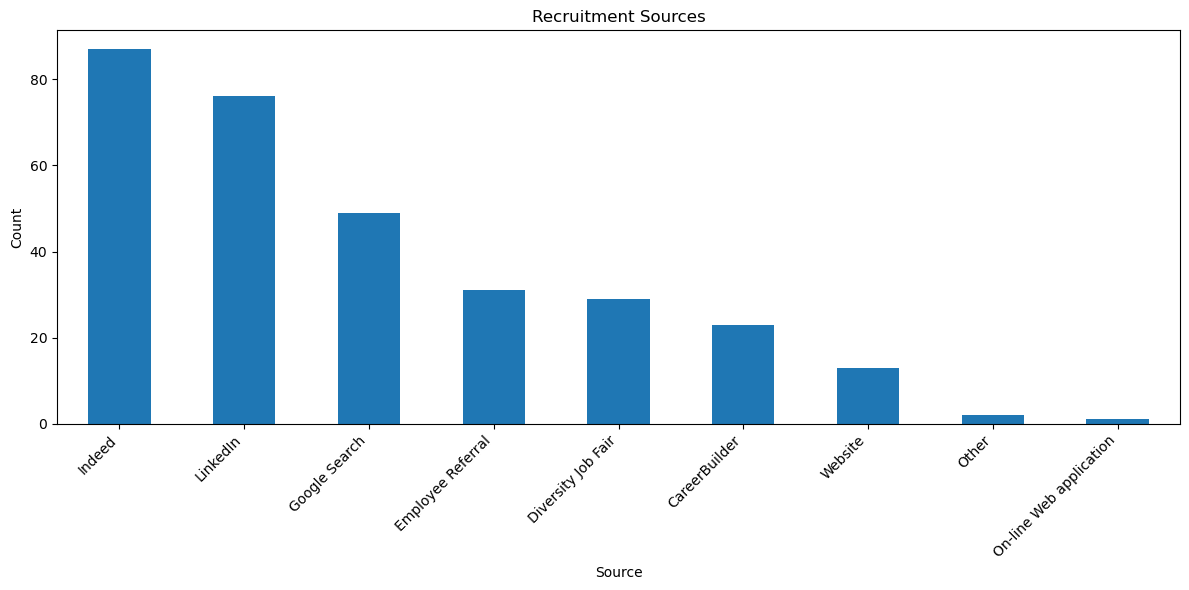

In [69]:
# Get the value counts of RecruitmentSource
recruitment_sources = df['RecruitmentSource'].value_counts()

# Display the results
print("Recruitment Sources and their counts:")
print(recruitment_sources)

# Display as a percentage
print("\nRecruitment Sources as percentage:")
print(df['RecruitmentSource'].value_counts(normalize=True) * 100)

plt.figure(figsize=(12, 6))
recruitment_sources.plot(kind='bar')
plt.title('Recruitment Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deore\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deore\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Topic 1: position, hours, area, relocation, performance, unhappy, retiring, military, attendance, money
Topic 2: unhappy, performance, leave, maternity, return, hours, position, retiring, military, attendance
Topic 3: money, military, medical, issues, hours, position, performance, unhappy, retiring, attendance
Topic 4: attendance, return, school, retiring, hours, position, performance, unhappy, military, money
Topic 5: career, change, hours, position, performance, unhappy, retiring, military, attendance, money


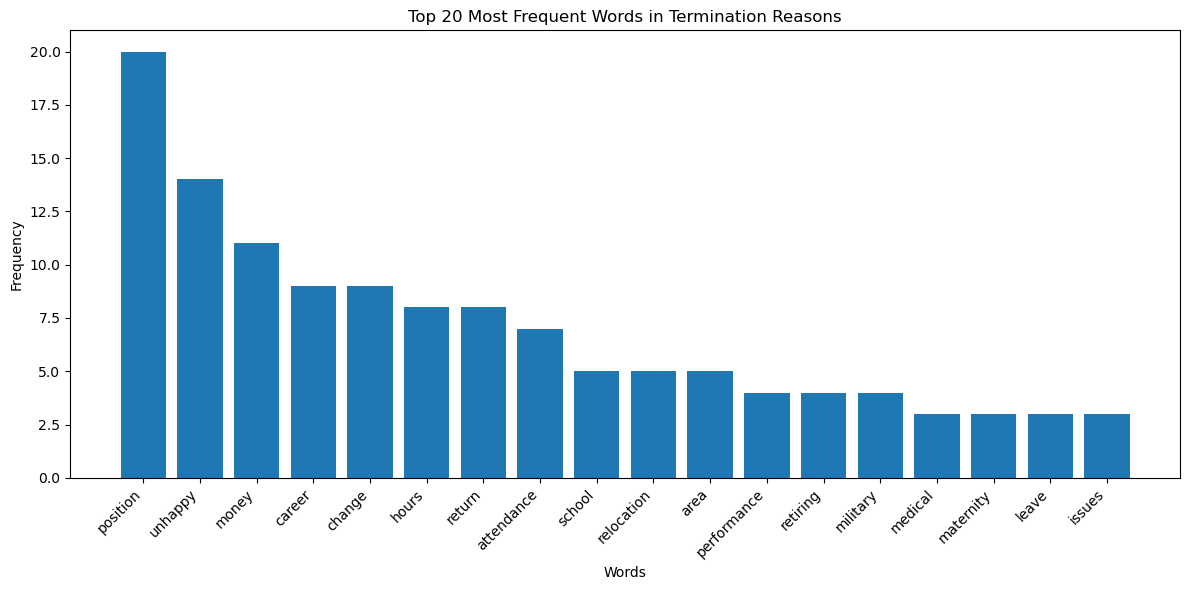


Top 20 most frequent words:
           word  freq
0      position    20
1       unhappy    14
2         money    11
3        career     9
4        change     9
5         hours     8
6        return     8
7    attendance     7
8        school     5
9    relocation     5
10         area     5
11  performance     4
12     retiring     4
13     military     4
14      medical     3
15    maternity     3
16        leave     3
17       issues     3


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Prepare the data
# Filter the dataframe to include only terminated employees
terminated_df = df[df['Termd'] == 1]

# Preprocess the text
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    if pd.isna(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

terminated_df['Processed_TermReason'] = terminated_df['TermReason'].apply(preprocess_text)

# Create document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(terminated_df['Processed_TermReason'])

# Apply Latent Dirichlet Allocation (LDA)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(doc_term_matrix)

# Step 5: Print the top words for each topic
# Use get_feature_names_out() if available, otherwise fall back to get_feature_names()
if hasattr(vectorizer, 'get_feature_names_out'):
    feature_names = vectorizer.get_feature_names_out()
else:
    feature_names = vectorizer.get_feature_names()

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

print_top_words(lda_model, feature_names, 10)

# Visualize the results
topic_counts = lda_output.argmax(axis=1)
topic_distribution = np.bincount(topic_counts, minlength=lda_model.n_components)

# Analyze frequent words
word_freq = vectorizer.transform(terminated_df['Processed_TermReason']).sum(axis=0).A1
word_freq = pd.DataFrame({'word': feature_names, 'freq': word_freq})
word_freq = word_freq.sort_values('freq', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.bar(word_freq['word'][:20], word_freq['freq'][:20])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Termination Reasons')
plt.tight_layout()
plt.show()

print("\nTop 20 most frequent words:")
print(word_freq.head(20))